In [39]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#Load the data
df = pd.read_csv('/Users/macbook/MY_PROJECTS/text-to-speech-data-collection/data/Amharic News Dataset.csv')

#View the data
df.shape

(51483, 6)

**1. Basic information about data**

Some basic information about the data type, non-null values and memory usage.

In [40]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


Let's see the descriptive statistics that summarize the central tendency of the variable, their dispersion, the presence of empty values and their shape.

In [41]:
#Describe the data
df.describe()

,headline,category,date,views,article,link
count,51470,51482,51483,51483,51483,51483
unique,50095,6,6189,4408,50285,50778
top,አፍሪካ በጋዜጦች,ሀገር አቀፍ ዜና,2021-01-04,Unknown,,https://amharic.voanews.com//a/london-marathon...
freq,49,20674,869,32943,121,3


**2. Find the Null values**

In [42]:
#Find null values
df.isnull().sum()

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64

 We have some null values in the ‘headline’ and ‘category’ variables. Since the nul values are not that much, we can do without them.

In [43]:
# Drop null values
df.dropna(inplace = True)

# Check the changes now
df.isnull().sum()

headline    0
category    0
date        0
views       0
article     0
link        0
dtype: int64

**3. Understanding of the variables**

Though we have no numerical column in the dataset, not all of them are categorical, the only categorical variable we have is the 'category' column. Let's see how many values are given in the column.

For poper understanding, let's rename the categories to its English equivalent

In [44]:
df.category.replace(to_replace=['ሀገር አቀፍ ዜና', 'ስፖርት', 'ፖለቲካ', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'መዝናኛ'], 
                    value=['local_news', 'sport', 'politics', 'international_news', 'business', 'entertainment'], 
                    inplace=True)

df.category.head()

0            sport
1    entertainment
2            sport
3            sport
4            sport
Name: category, dtype: object

In [45]:
# Value counts of the category column
df.category.value_counts()

local_news            20665
sport                 10411
politics               9325
international_news     6543
business               3894
entertainment           632
Name: category, dtype: int64

We can also plot the data, but creating a plot from such a big dataset throws a memory error, so we create a sample first, then we plot that sample

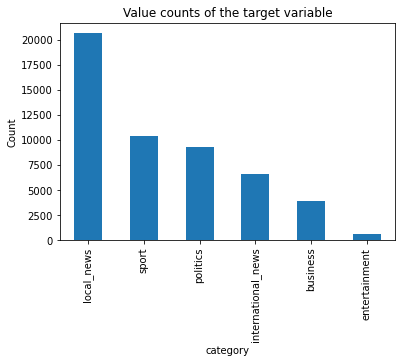

In [47]:
# creating a sample
df.category.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("category")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

**4. Study of relationships between variables**
Exploring the dataset to find interesting relationships that show the influence of one variable on the other

In [53]:
df.views.head()

0     2
1     4
2     6
3     5
4    12
Name: views, dtype: object